# KODE AWAL (DENGAN INPUTAN YANG SUDAH DITENTUKAN)

ALGORITMA ITERATIF

In [7]:
distance_matrix = [
    [0, 20, 15, 20],
    [10, 0, 40, 25],
    [15, 46, 0, 30],
    [20, 12, 30, 0]
]

In [8]:
def solve_tsp_iterative(distance_matrix):
    N = len(distance_matrix)
    stack = []
    min_distance = float('inf')

    # Initial state: start from city 0
    stack.append(([0], 0))  # (path, current_distance)

    while stack:
        path, current_distance = stack.pop()

        if len(path) == N:
            total_distance = current_distance + distance_matrix[path[-1]][path[0]]  # Return to starting city
            min_distance = min(min_distance, total_distance)
        else:
            current_city = path[-1]
            for next_city in range(N):
                if next_city not in path:
                    new_path = path + [next_city]
                    stack.append((new_path, current_distance + distance_matrix[current_city][next_city]))

    return min_distance

In [9]:
iterative_result = solve_tsp_iterative(distance_matrix)
iterative_result

67

ALGORITMA REKURSIF

In [10]:
def solve_tsp_recursive(distance_matrix):
    def tsp_backtrack(path, current_distance):
        if len(path) == len(distance_matrix):
            return current_distance + distance_matrix[path[-1]][path[0]]  # Return to starting city

        min_distance = float('inf')
        current_city = path[-1]

        for next_city in range(len(distance_matrix)):
            if next_city not in path:
                path.append(next_city)
                distance = tsp_backtrack(path, current_distance + distance_matrix[current_city][next_city])
                min_distance = min(min_distance, distance)
                path.pop()  # Backtrack

        return min_distance

    return tsp_backtrack([0], 0)

In [11]:
recursive_result = solve_tsp_recursive(distance_matrix)
recursive_result

67

# PERBANDINGAN RUNNING TIME KODE

In [12]:
import random
import time
import matplotlib.pyplot as plt

In [13]:
# Fungsi TSP rekursif untuk mencari jarak minimum
# Menggunakan pendekatan backtracking

def solve_tsp_recursive(matriks_jarak):
    def jelajah_tsp(jalur, jarak_saat_ini):
        if len(jalur) == len(matriks_jarak):
            return jarak_saat_ini + matriks_jarak[jalur[-1]][jalur[0]]  # Kembali ke kota awal

        jarak_minimum = float('inf')
        kota_sekarang = jalur[-1]

        for kota_berikutnya in range(len(matriks_jarak)):
            if kota_berikutnya not in jalur:
                jalur.append(kota_berikutnya)
                jarak = jelajah_tsp(jalur, jarak_saat_ini + matriks_jarak[kota_sekarang][kota_berikutnya])
                jarak_minimum = min(jarak_minimum, jarak)
                jalur.pop()  # Kembali (backtrack)

        return jarak_minimum

    return jelajah_tsp([0], 0)  # Mulai dari kota 0 dengan jarak 0

In [14]:
# Fungsi TSP iteratif untuk mencari jarak minimum
# Menggunakan pendekatan stack

def solve_tsp_iterative(matriks_jarak):
    N = len(matriks_jarak)
    tumpukan = []
    jarak_minimum = float('inf')

    # Keadaan awal: mulai dari kota 0
    tumpukan.append(([0], 0))  # (jalur, jarak_saat_ini)

    while tumpukan:
        jalur, jarak_saat_ini = tumpukan.pop()

        if len(jalur) == N:
            jarak_total = jarak_saat_ini + matriks_jarak[jalur[-1]][jalur[0]]  # Kembali ke kota awal
            jarak_minimum = min(jarak_minimum, jarak_total)
        else:
            kota_sekarang = jalur[-1]
            for kota_berikutnya in range(N):
                if kota_berikutnya not in jalur:
                    jalur_baru = jalur + [kota_berikutnya]
                    tumpukan.append((jalur_baru, jarak_saat_ini + matriks_jarak[kota_sekarang][kota_berikutnya]))

    return jarak_minimum

In [15]:
# Fungsi untuk membuat matriks jarak acak
def generate_distance_matrix(n):
    matriks = [[0 if i == j else random.randint(10, 100) for j in range(n)] for i in range(n)]
    return matriks

In [16]:
# Fungsi untuk mengukur runtime
def measure_runtime(func, matriks):
    start_time = time.time()
    func(matriks)
    end_time = time.time()
    return end_time - start_time

PERBANDINGAN UNTUK KASUS KOTA YANG KECIL DAN BESAR

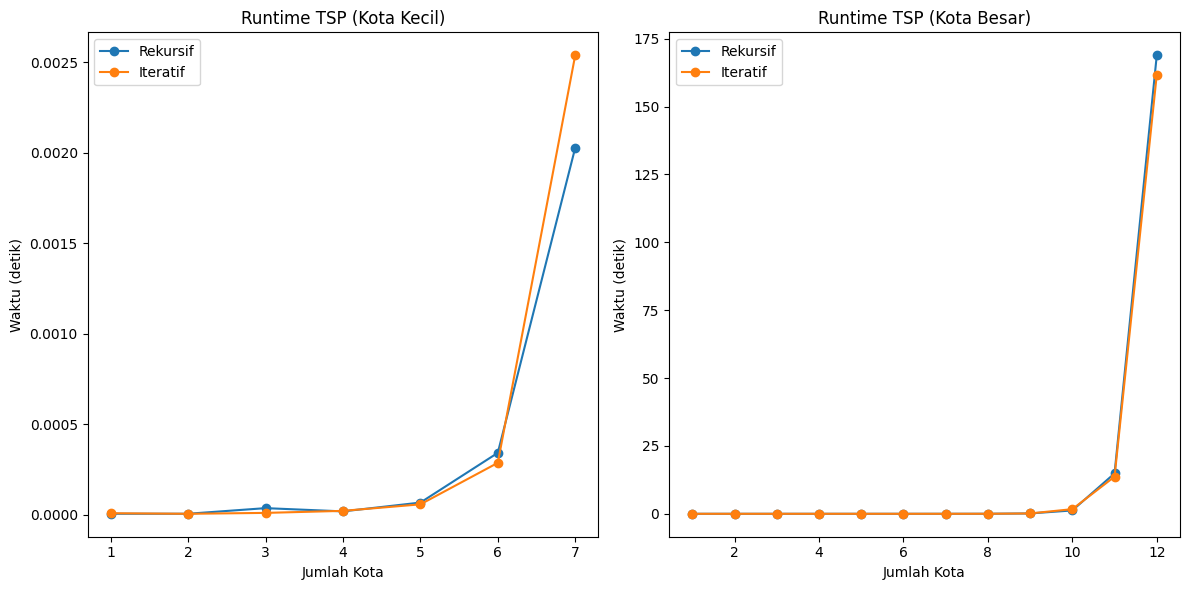

In [17]:
# Membandingkan runtime untuk skenario kecil dan besar
def compare_runtime():
    kota_kecil = list(range(1, 8))  # Skenario kota kecil (1-7 kota)
    kota_besar = list(range(1, 13))  # Skenario kota banyak (1-12 kota)

    runtime_recursive_kecil = []
    runtime_iterative_kecil = []
    runtime_recursive_besar = []
    runtime_iterative_besar = []

    # Mengukur runtime untuk skenario kota kecil
    for n in kota_kecil:
        matriks = generate_distance_matrix(n)
        runtime_recursive_kecil.append(measure_runtime(solve_tsp_recursive, matriks))
        runtime_iterative_kecil.append(measure_runtime(solve_tsp_iterative, matriks))

    # Mengukur runtime untuk skenario kota besar
    for n in kota_besar:
        matriks = generate_distance_matrix(n)
        runtime_recursive_besar.append(measure_runtime(solve_tsp_recursive, matriks))
        runtime_iterative_besar.append(measure_runtime(solve_tsp_iterative, matriks))

    # Membuat grafik runtime
    plt.figure(figsize=(12, 6))

    # Plot untuk skenario kota kecil
    plt.subplot(1, 2, 1)
    plt.plot(kota_kecil, runtime_recursive_kecil, label='Rekursif', marker='o')
    plt.plot(kota_kecil, runtime_iterative_kecil, label='Iteratif', marker='o')
    plt.title('Runtime TSP (Kota Kecil)')
    plt.xlabel('Jumlah Kota')
    plt.ylabel('Waktu (detik)')
    plt.legend()

    # Plot untuk skenario kota besar
    plt.subplot(1, 2, 2)
    plt.plot(kota_besar, runtime_recursive_besar, label='Rekursif', marker='o')
    plt.plot(kota_besar, runtime_iterative_besar, label='Iteratif', marker='o')
    plt.title('Runtime TSP (Kota Besar)')
    plt.xlabel('Jumlah Kota')
    plt.ylabel('Waktu (detik)')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Menjalankan perbandingan runtime
compare_runtime()